In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
airbnb_data = pd.read_spss(r"C:\Users\Bilal\Desktop\Airbnb_data.sav")

In [3]:
airbnb_data.head()

,Price,PropertyType,RoomType,Accommodates,Bathrooms,CancellationPolicy,CleaningFee,City,ProfilePic,VerifiedIdentity,ResponseRate,ReviewNumber,Rating,Bedrooms,Beds,partition
0,45.0,Apartment,PrivateRoom,2.0,1.0,Strict,1.0,NYC,1.0,1.0,1.0,18.0,0.98,1.0,1.0,test
1,68.0,Other,EntireHome,2.0,1.0,Strict,1.0,LA,1.0,1.0,1.0,3.0,0.87,1.0,1.0,test
2,700.0,Condominium,EntireHome,5.0,2.0,Strict,1.0,LA,1.0,1.0,1.0,1.0,0.80,2.0,2.0,train
3,175.0,Apartment,EntireHome,4.0,1.0,Strict,1.0,NYC,1.0,1.0,1.0,57.0,0.97,1.0,2.0,train
4,99.0,Apartment,EntireHome,4.0,1.0,Flexible,1.0,LA,1.0,0.0,1.0,30.0,0.99,1.0,3.0,train


In [4]:
airbnb_data.describe()

,Price,Accommodates,Bathrooms,CleaningFee,ProfilePic,VerifiedIdentity,ResponseRate,ReviewNumber,Rating,Bedrooms,Beds
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,146.018500,3.31650,1.234500,0.820000,0.99850,0.728500,0.955545,30.39200,0.942155,1.293500,1.812000
std,127.640226,2.24919,0.565614,0.384284,0.03871,0.444845,0.128345,41.54982,0.070975,0.847772,1.345943
min,10.000000,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,0.200000,0.000000,1.000000
25%,71.000000,2.00000,1.000000,1.000000,1.00000,0.000000,1.000000,5.00000,0.920000,1.000000,1.000000
50%,110.000000,2.00000,1.000000,1.000000,1.00000,1.000000,1.000000,14.00000,0.960000,1.000000,1.000000
75%,175.000000,4.00000,1.000000,1.000000,1.00000,1.000000,1.000000,38.00000,0.990000,1.000000,2.000000
max,1500.000000,16.00000,8.000000,1.000000,1.00000,1.000000,1.000000,360.00000,1.000000,6.000000,16.000000


In [5]:
airbnb_data.drop_duplicates()
airbnb_data.isnull().sum()

Price                 0
PropertyType          0
RoomType              0
Accommodates          0
Bathrooms             0
CancellationPolicy    0
CleaningFee           0
City                  0
ProfilePic            0
VerifiedIdentity      0
ResponseRate          0
ReviewNumber          0
Rating                0
Bedrooms              0
Beds                  0
partition             0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for column in airbnb_data.columns:
    if airbnb_data[column].dtype == 'object':
        airbnb_data[column] = label_encoder.fit_transform(airbnb_data[column])

In [7]:
airbnb_data

,Price,PropertyType,RoomType,Accommodates,Bathrooms,CancellationPolicy,CleaningFee,City,ProfilePic,VerifiedIdentity,ResponseRate,ReviewNumber,Rating,Bedrooms,Beds,partition
0,45.0,0,1,2.0,1.0,2,1.0,4,1.0,1.0,1.0,18.0,0.98,1.0,1.0,0
1,68.0,3,0,2.0,1.0,2,1.0,3,1.0,1.0,1.0,3.0,0.87,1.0,1.0,0
2,700.0,1,0,5.0,2.0,2,1.0,3,1.0,1.0,1.0,1.0,0.80,2.0,2.0,1
3,175.0,0,0,4.0,1.0,2,1.0,4,1.0,1.0,1.0,57.0,0.97,1.0,2.0,1
4,99.0,0,0,4.0,1.0,0,1.0,3,1.0,0.0,1.0,30.0,0.99,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99.0,0,1,2.0,1.0,2,0.0,4,1.0,1.0,1.0,72.0,0.85,1.0,1.0,1
1996,90.0,0,1,2.0,1.0,2,1.0,4,1.0,1.0,1.0,22.0,0.96,1.0,1.0,1
1997,239.0,0,0,6.0,1.0,2,1.0,4,1.0,0.0,1.0,61.0,0.82,2.0,4.0,0
1998,175.0,0,1,2.0,1.0,1,1.0,5,1.0,1.0,1.0,108.0,0.99,1.0,1.0,1


In [8]:
airbnb_data.corr()

,Price,PropertyType,RoomType,Accommodates,Bathrooms,CancellationPolicy,CleaningFee,City,ProfilePic,VerifiedIdentity,ResponseRate,ReviewNumber,Rating,Bedrooms,Beds,partition
Price,1.000000,0.087265,-0.461003,0.579123,0.461614,0.149300,0.112815,0.065579,-0.026419,-0.008387,-0.007751,-0.037878,0.054469,0.565093,0.480629,0.026635
PropertyType,0.087265,1.000000,0.112782,0.154247,0.231368,-0.010092,-0.001058,-0.075311,-0.007964,-0.008665,0.008352,0.025694,0.034818,0.184653,0.162932,0.035971
RoomType,-0.461003,0.112782,1.000000,-0.436629,-0.094612,-0.154389,-0.240134,0.037713,-0.014748,-0.018567,-0.013568,-0.022453,-0.044131,-0.278366,-0.317609,-0.037695
Accommodates,0.579123,0.154247,-0.436629,1.000000,0.540315,0.196960,0.179964,-0.061176,-0.046255,0.034428,0.035629,0.013847,-0.065350,0.738573,0.839292,0.011112
Bathrooms,0.461614,0.231368,-0.094612,0.540315,1.000000,0.094268,0.075766,-0.060441,0.016073,0.028498,0.008989,-0.042974,-0.024308,0.566847,0.549460,0.034152
CancellationPolicy,0.149300,-0.010092,-0.154389,0.196960,0.094268,1.000000,0.239375,0.041661,0.017021,0.076412,0.027226,0.108573,-0.056479,0.144333,0.167905,0.029595
CleaningFee,0.112815,-0.001058,-0.240134,0.179964,0.075766,0.239375,1.000000,0.027873,-0.018159,0.097331,0.071062,-0.001563,0.024500,0.137675,0.129912,0.011360
City,0.065579,-0.075311,0.037713,-0.061176,-0.060441,0.041661,0.027873,1.000000,0.016499,-0.017459,-0.039774,-0.015238,-0.033065,-0.037832,-0.033488,-0.032827
ProfilePic,-0.026419,-0.007964,-0.014748,-0.046255,0.016073,0.017021,-0.018159,0.016499,1.000000,0.063489,0.022819,-0.017673,-0.006106,0.028665,0.023389,0.002819
VerifiedIdentity,-0.008387,-0.008665,-0.018567,0.034428,0.028498,0.076412,0.097331,-0.017459,0.063489,1.000000,0.034705,0.117675,0.025512,0.021715,0.022489,-0.039008


In [9]:
x = airbnb_data[['PropertyType', 'RoomType', 'Accommodates', 'Bathrooms','Bedrooms', 'Beds']]
y = airbnb_data['Price']

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,shuffle=True) 

In [11]:
x_train=sm.add_constant(x_train) # calculate intercept or beta node or constant
regression_model=sm.OLS(y_train,x_train) # creating obejct of sm.OLS (Ordinary least square)
results=regression_model.fit() # actual calculation / best fit
results.summary() # display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     201.6
Date:                Fri, 23 Feb 2024   Prob (F-statistic):          4.29e-185
Time:                        15:38:44   Log-Likelihood:                -8281.4
No. Observations:                1400   AIC:                         1.658e+04
Df Residuals:                    1393   BIC:                         1.661e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           55.1541      6.594      8.365      0.000      42.220      68.089
PropertyType     0.7481      2.291      0.327      0.744      -3.746       5.242
RoomType       -73.7028      5.000    -14.740      0.000     -83.512     -63.894
Accommodates     9.0997      2.295      3.965      0.000       4.597      13.602
Bathrooms       37.4598      5.225      7.169      0.000      27.210      47.709
Bedrooms        45.0592      4.549      9.905      0.000      36.135      53.983
Beds            -6.0578      3.514     -1.724      0.085     -12.951       0.835
==============================================================================
Omnibus:                     1046.522   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30254.049
Skew:                           3.164   Prob(JB):                         0.00
Kurtosis:                      24.877   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import numpy as np

In [18]:
y_train_pred = results.predict(x_train)
y_test_pred = results.predict(sm.add_constant(x_test))
rmse_train = np.sqrt(np.mean((y_train - y_train_pred)**2))
rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))

In [19]:
print("RMSE for training set:", rmse_train)
print("RMSE for test set:", rmse_test)

RMSE for training set: 89.68657522956471
RMSE for test set: 100.99580981488663


In [20]:
#Polynomial Regression

In [22]:
import matplotlib.pyplot as plt

In [23]:
airbnb_data.columns

Index(['Price', 'PropertyType', 'RoomType', 'Accommodates', 'Bathrooms',
       'CancellationPolicy', 'CleaningFee', 'City', 'ProfilePic',
       'VerifiedIdentity', 'ResponseRate', 'ReviewNumber', 'Rating',
       'Bedrooms', 'Beds', 'partition'],
      dtype='object')

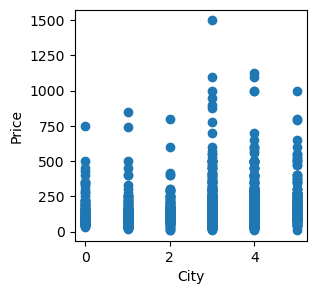

In [29]:
plt.figure(figsize=(3,3))
plt.scatter(airbnb_data.City, airbnb_data.Price)
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

C:\Users\Bilal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


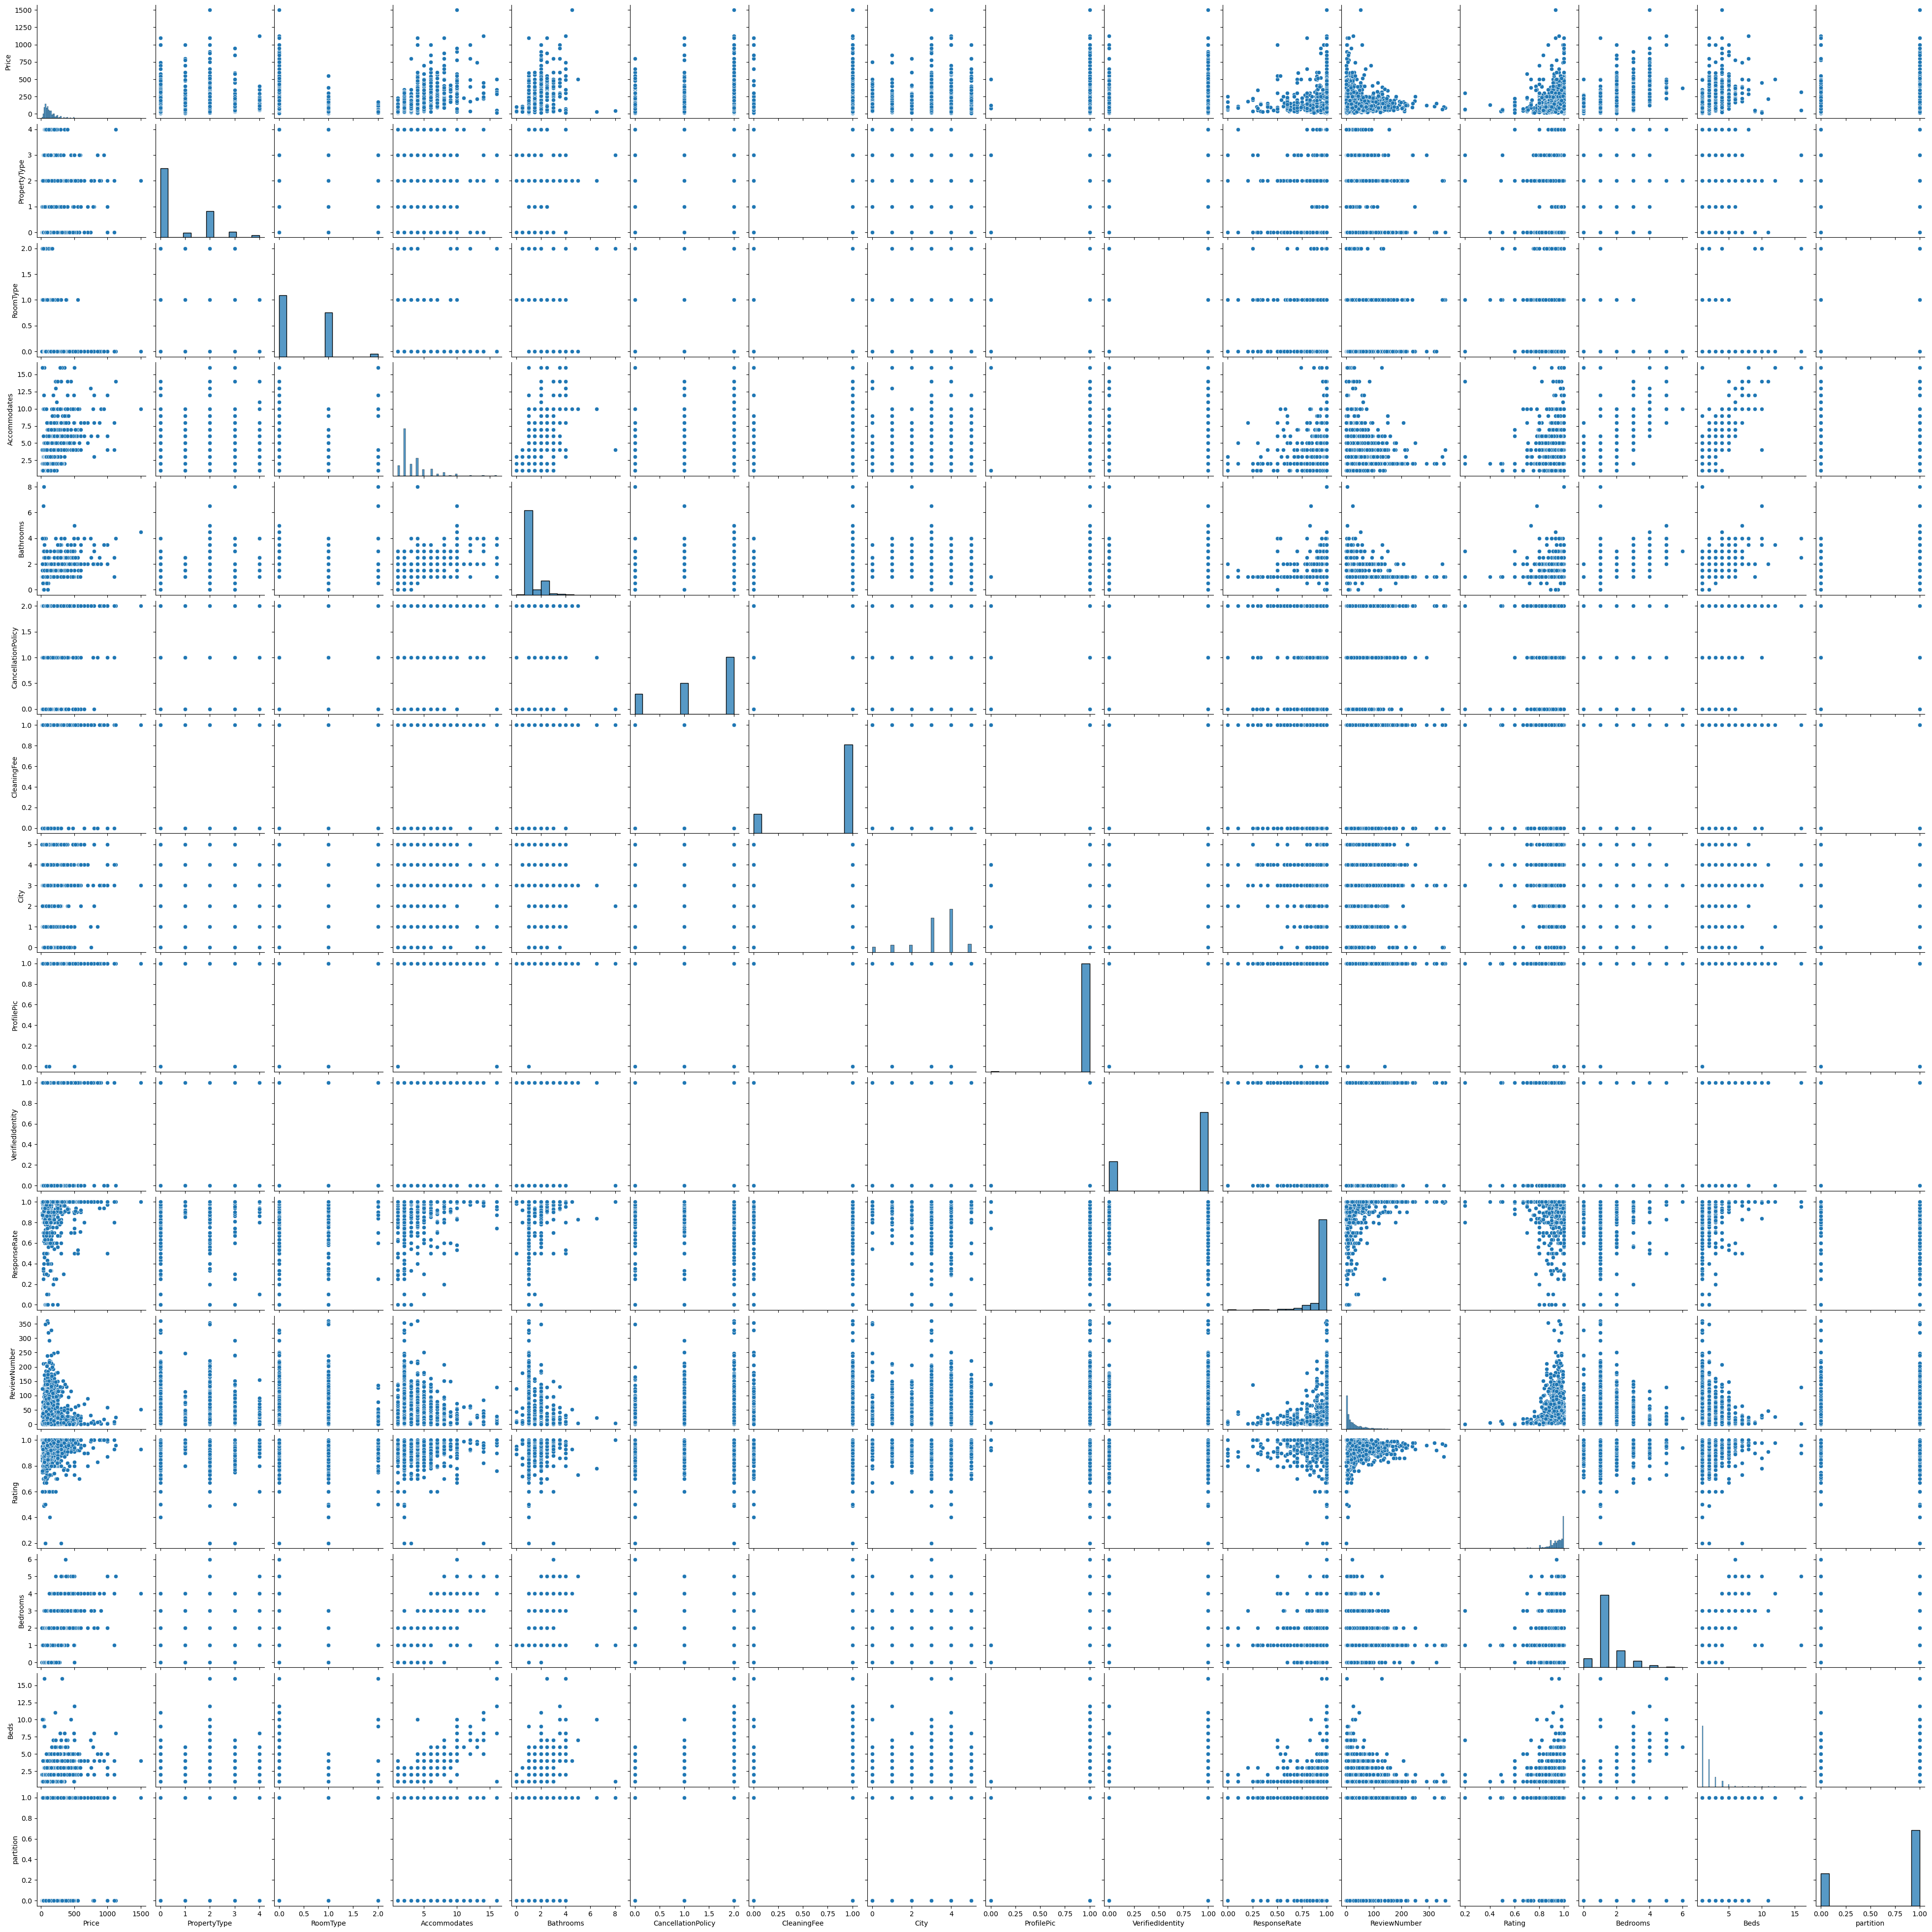

In [26]:
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame containing the columns mentioned
columns_to_plot = ['Price', 'PropertyType', 'RoomType', 'Accommodates', 'Bathrooms',
                   'CancellationPolicy', 'CleaningFee', 'City', 'ProfilePic',
                   'VerifiedIdentity', 'ResponseRate', 'ReviewNumber', 'Rating',
                   'Bedrooms', 'Beds', 'partition']

# Select only the columns to plot
data_to_plot = airbnb_data[columns_to_plot]

# Create scatter plots
sns.pairplot(data_to_plot)

In [37]:
# Step 1: Train-Test Split
X = airbnb_data[['PropertyType', 'RoomType', 'Accommodates', 'Bathrooms',
                   'CancellationPolicy', 'CleaningFee','Bedrooms', 'Beds']]  # IV: Independent Variable(s)
y = airbnb_data['Price']    # DV: Dependent Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Step 2: Polynomial Regression
# You can change the degree of the polynomial if needed
degree = 1
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Step 3: Predictions and RMSE Calculation
# Predict on the test set
y_pred = poly_reg.predict(X_test_poly)
y_pred2 = poly_reg.predict(X_train_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred2))
print("Train Root Mean Squared Error (RMSE):", rmse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Root Mean Squared Error (RMSE):", rmse)

Train Root Mean Squared Error (RMSE): 91.70953907778805
Test Root Mean Squared Error (RMSE): 95.74806983085308


In [38]:
data_price =np.array (airbnb_data.Price).reshape(-1,1)
data_city =np.array(airbnb_data.City).reshape(-1,1)
print (data_price)
print (data_city )

[[ 45.]
 [ 68.]
 [700.]
 ...
 [239.]
 [175.]
 [192.]]
[[4]
 [3]
 [3]
 ...
 [4]
 [5]
 [5]]


In [39]:
poly_features=PolynomialFeatures(degree=3, include_bias=False) 
poly_features.fit(data_city)
poly_features=poly_features.transform(data_city) 
poly_features

array([[  4.,  16.,  64.],
       [  3.,   9.,  27.],
       [  3.,   9.,  27.],
       ...,
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  5.,  25., 125.]])

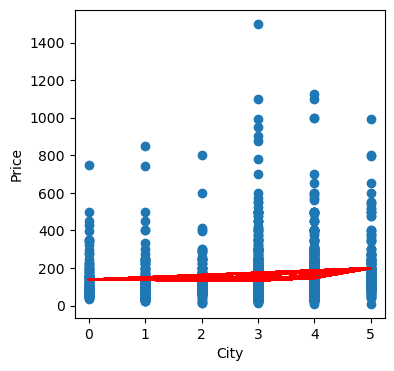

In [40]:
poly_reg_model=LinearRegression()
poly_reg_model.fit(poly_features, data_price) 
poly_reg_model.coef_ 
price_predicted=poly_reg_model.predict(poly_features) 
plt.figure(figsize=(4,4)) 
plt.scatter(airbnb_data.City, airbnb_data.Price) 
plt.plot(airbnb_data.City,price_predicted, c='red') 
plt.xlabel ('City') 
plt.ylabel ('Price')
plt.show() 

In [36]:
#Ridge and Lasso Regression

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [44]:
variables_in_study = airbnb_data[['PropertyType', 'RoomType', 'Accommodates', 'Bathrooms','Bedrooms', 'Beds','Price']]
scaler = StandardScaler() 
scaler.fit(variables_in_study)
variables_in_study = scaler.transform(variables_in_study) 

variables_in_study = pd.DataFrame(variables_in_study, columns = ['PropertyType', 'RoomType', 'Accommodates', 'Bathrooms','Bedrooms', 'Beds','Price'])
independent_variables = variables_in_study[['PropertyType', 'RoomType', 'Accommodates', 'Bathrooms','Bedrooms', 'Beds']]
dependent_variable = variables_in_study['Price']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2)

In [47]:
print('data shape is: ', airbnb_data.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

data shape is:  (2000, 16)
x_train shape is:  (1600, 6)
x_test shape is:  (400, 6)
y_train shape is:  (1600,)
y_test shape is:  (400,)


In [48]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,predictions)
    
    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)
    
    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

In [49]:
regression_model = sm.OLS(y_train, x_train)
results = regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.489
Model:                            OLS   Adj. R-squared (uncentered):              0.487
Method:                 Least Squares   F-statistic:                              254.0
Date:                Fri, 23 Feb 2024   Prob (F-statistic):                   4.75e-228
Time:                        16:17:44   Log-Likelihood:                         -1748.4
No. Observations:                1600   AIC:                                      3509.
Df Residuals:                    1594   BIC:                                      3541.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PropertyType     0.0237      0.019      1.252      0.211      -0.013       0.061
RoomType        -0.3120      0.021    -14.934      0.000      -0.353      -0.271
Accommodates     0.2354      0.037      6.392      0.000       0.163       0.308
Bathrooms        0.2288      0.023     10.149      0.000       0.185       0.273
Bedrooms         0.2671      0.029      9.155      0.000       0.210       0.324
Beds            -0.1279      0.035     -3.690      0.000      -0.196      -0.060
==============================================================================
Omnibus:                     1210.126   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37906.159
Skew:                           3.211   Prob(JB):                         0.00
Kurtosis:                      25.964   Cond. No.                         4.54
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)
print(results.params)

0.48873010310201237
0.4868056241927351
PropertyType    2.107997e-01
RoomType        2.663023e-47
Accommodates    2.138781e-10
Bathrooms       1.699088e-23
Bedrooms        1.610344e-19
Beds            2.318065e-04
dtype: float64
PropertyType    0.023699
RoomType       -0.312034
Accommodates    0.235435
Bathrooms       0.228789
Bedrooms        0.267102
Beds           -0.127910
dtype: float64


In [51]:
predictions = results.predict(x_test)

In [52]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.4639631018719604
MSE: 0.5716169857679297
RMSE: 0.7560535601185473
R-Squared: 0.38225351067093816


In [53]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [54]:
predictions = lin_reg.predict(poly_reg.fit_transform(x_test))

In [55]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.5525699526881619
MSE: 2.906506460635335
RMSE: 1.7048479288884786
R-Squared: -2.14106159714201


In [56]:
rdg = Ridge(alpha = 2) # alpha is lamda
rdg = rdg.fit(x_train, y_train)
predictions = rdg.predict(x_test)

In [57]:
print(rdg.score(x_train, y_train)) #R-squared
print(rdg.coef_)
print(rdg.intercept_)

0.48872985380154954
[ 0.0237113  -0.31163063  0.23457599  0.22847866  0.26659864 -0.1263371 ]
-0.0019169612143129892


In [58]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.46354309234675306
MSE: 0.5715644213642965
RMSE: 0.7560187969649277
R-Squared: 0.38231031702312246


In [59]:
lasso = Lasso(alpha=0.01) # Lasso is used to remove less important variables
lasso = lasso.fit(x_train, y_train) 
prediction = lasso.predict(x_test)

In [60]:
print(lasso.score(x_train, y_train))
print(lasso.coef_)
print(lasso.intercept_)

0.48715911536325507
[ 0.01477341 -0.30230075  0.19189945  0.21734604  0.25083791 -0.05784675]
-0.001824748727085719


In [61]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.46354309234675306
MSE: 0.5715644213642965
RMSE: 0.7560187969649277
R-Squared: 0.38231031702312246


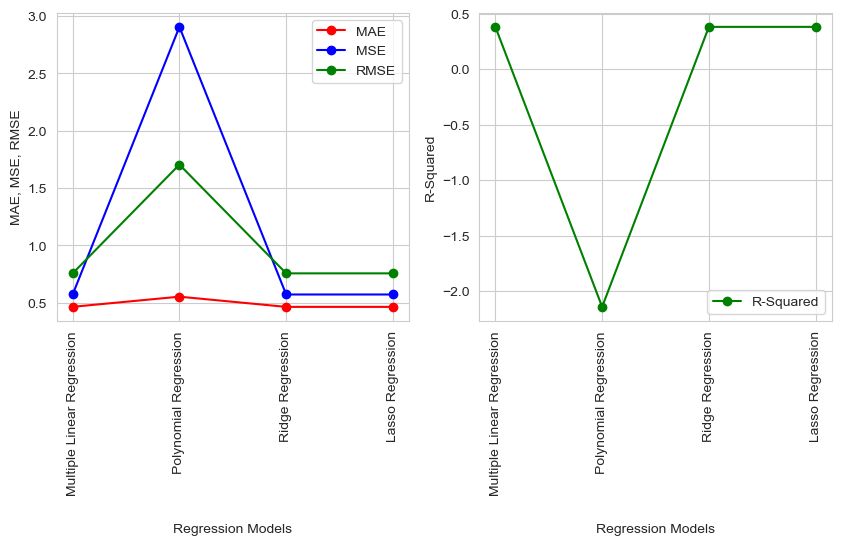

In [63]:
sns.set_style('whitegrid')

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4));
ax1.plot(MAE_list,color='red', label='MAE', marker="o")
ax1.plot(MSE_list, color='blue', label='MSE', marker="o")
ax1.plot(RMSE_list,color='green', label='RMSE', marker="o")
ax2.plot(R_Squared_list,  color='green', label='R-Squared', marker="o")
ax1.legend()
ax2.legend()
ax1.set_xticks(ticks=range(len(MAE_list)))
ax2.set_xticks(ticks=range(len(R_Squared_list)))
ax1.set_xticklabels(models_list, rotation=90)
ax2.set_xticklabels(models_list, rotation=90)
ax1.set_xlabel('Regression Models', labelpad=20)
ax2.set_xlabel('Regression Models', labelpad=20)
ax1.set_ylabel('MAE, MSE, RMSE')
ax2.set_ylabel('R-Squared')
plt.show()

based on the provided regression results and performance metrics for different algorithms, we can assess which algorithm performs best for predicting the price (dependent variable) based on the given independent variables. Let's analyze each algorithm and its performance:

OLS (Ordinary Least Squares) Regression:

R-Squared (Goodness of Fit): 0.465
RMSE (Root Mean Squared Error) for training set: 89.69
RMSE for test set: 100.99
Polynomial Regression:

Train RMSE: 91.71
Test RMSE: 95.75
Ridge and Lasso Regression:

For Ridge:
MAE (Mean Absolute Error): 0.55
MSE (Mean Squared Error): 2.91
RMSE: 1.70
R-Squared: -2.14
For Lasso:
MAE: 0.46
MSE: 0.57
RMSE: 0.76
R-Squared: 0.38
Interpretation:

Among the algorithms tested, Lasso Regression performs the best based on the evaluation metrics provided.
Lasso Regression provides a lower RMSE, indicating better performance in predicting the price compared to other algorithms.
Lasso Regression also achieves a higher R-squared value compared to Ridge Regression, indicating that it explains more variance in the dependent variable.
OLS Regression, while providing a decent R-squared value, has higher RMSE compared to Lasso Regression, suggesting that it may not generalize as well to unseen data.
Polynomial Regression performs slightly worse than Lasso Regression in terms of RMSE.
Ridge Regression performs the worst among the tested algorithms, with a negative R-squared value indicating poor model fit.
In conclusion, based on the provided data and evaluation metrics, Lasso Regression appears to be the best algorithm for predicting the price of properties in this dataset. It achieves a good balance between model complexity and performance, providing accurate predictions with lower error rates compared to other algorithms.